In [103]:
# -------------------------
# Imports
# -------------------------
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [105]:
# -------------------------
# CONFIG: paths to Excel files
# -------------------------
data_dir = "/Volumes/Siren/Brain_Analyses/BrainStemRadiomics/T1_last_tp/brainstem_region_outputs"
excel_file = f"{data_dir}/brainstem_region_intensity_stats_wide(1).xlsx"
df = pd.read_excel(excel_file)
df.columns = [c.strip().lower() for c in df.columns]
print (df.columns)

Index(['patient_id', 'survival (days)', 'bs_invasion',
       'midbrain_t1_voxel_count', 'pons', 'midbrain', 'medulla',
       'gbm initial dx', 'surgery', 'radiotherapy',
       ...
       'medulla_cyt_p05', 'medulla_cyt_p95', 'medulla_tpm_voxel_count',
       'medulla_tpm_mean', 'medulla_tpm_median', 'medulla_tpm_std',
       'medulla_tpm_min', 'medulla_tpm_max', 'medulla_tpm_p05',
       'medulla_tpm_p95'],
      dtype='object', length=180)


In [66]:
df['event'] = 1  
def plot_km(df, group_col, time_col='survival (days)', event_col='event', title='Kaplan-Meier Curve'):
    kmf = KaplanMeierFitter()
    groups = df[group_col].dropna().unique()
    
    plt.figure(figsize=(8,6))
    
    if len(groups) != 2:
        print(f"Warning: {group_col} does not have exactly 2 groups. Found: {groups}")
    
    curves = {}
    
    for group in groups:
        mask = df[group_col] == group
        kmf.fit(df.loc[mask, time_col], event_observed=df.loc[mask, event_col], label=str(group))
        kmf.plot_survival_function(ci_show=True)
        curves[group] = (df.loc[mask, time_col], df.loc[mask, event_col])
    
    # Calculate log-rank test if exactly 2 groups
    if len(groups) == 2:
        results = logrank_test(curves[groups[0]][0], curves[groups[1]][0],
                               event_observed_A=curves[groups[0]][1],
                               event_observed_B=curves[groups[1]][1])
        p_value = results.p_value
        plt.title(f"{title}\np-value: {p_value: 0.4f}")
    else:
        plt.title(title)
    
    plt.xlabel("Time (days)")
    plt.ylabel("Survival Probability")
    plt.grid(True)
    plt.show()

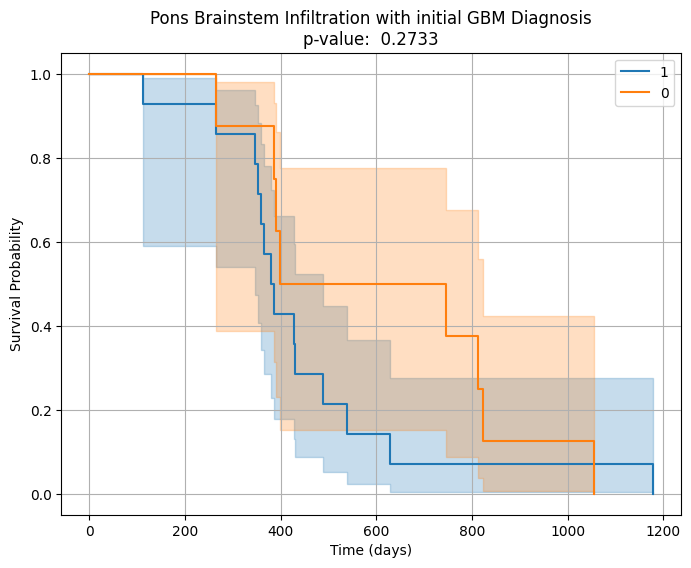

In [67]:
# -------------------------
# 1. Brainstem vs Non-Brainstem Invasion
# -------------------------

df_bs_gbm = df[ (df['bs_invasion'] == 1) &
    (df['gbm initial dx'] == 'Y')]
plot_km(df_bs_gbm, group_col='pons', title='Pons Brainstem Infiltration with initial GBM Diagnosis')

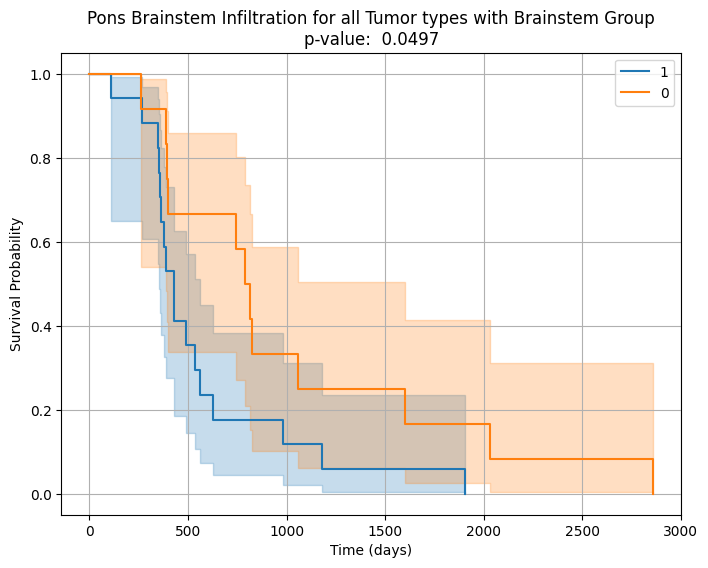

In [68]:

df_bs_gbm = df[ (df['bs_invasion'] == 1) ]
plot_km(df_bs_gbm, group_col='pons', title='Pons Brainstem Infiltration for all Tumor types with Brainstem Group')

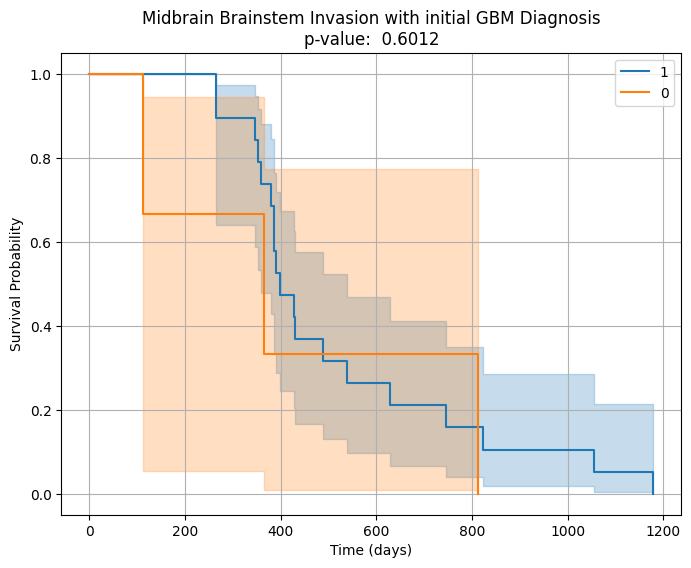

In [69]:
df_bs_gbm = df[ (df['bs_invasion'] == 1) &
    (df['gbm initial dx'] == 'Y')]
plot_km(df_bs_gbm, group_col='midbrain', title='Midbrain Brainstem Invasion with initial GBM Diagnosis')

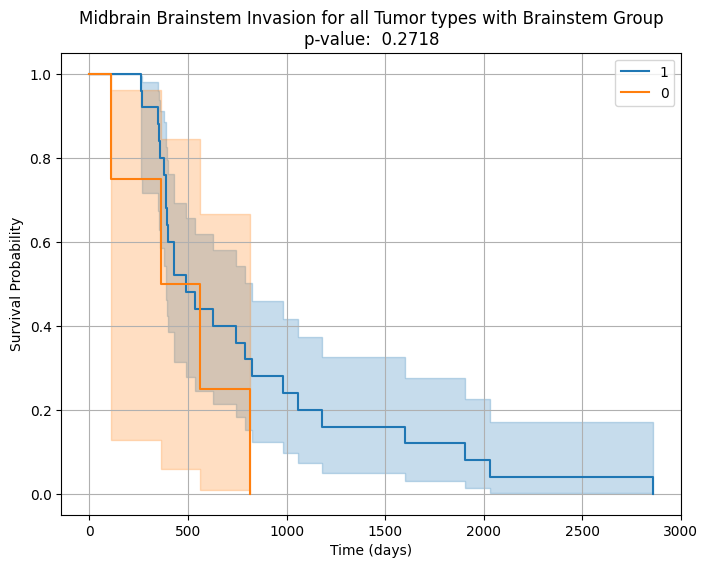

In [70]:
df_bs_gbm = df[ (df['bs_invasion'] == 1)]
plot_km(df_bs_gbm, group_col='midbrain', title='Midbrain Brainstem Invasion for all Tumor types with Brainstem Group')

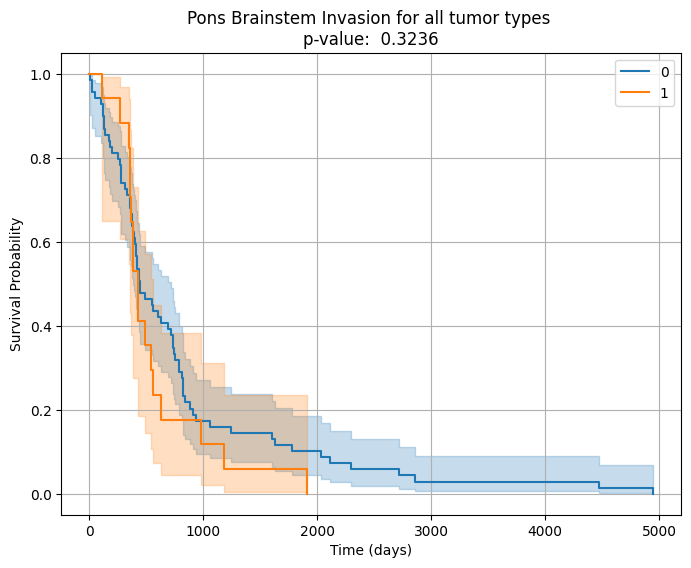

In [71]:
#df_bs_gbm = df[ (df['bs_invasion'] == 1) & (df['gbm initial dx'] == 'Y')]
plot_km(df, group_col='pons', title='Pons Brainstem Invasion for all tumor types ')

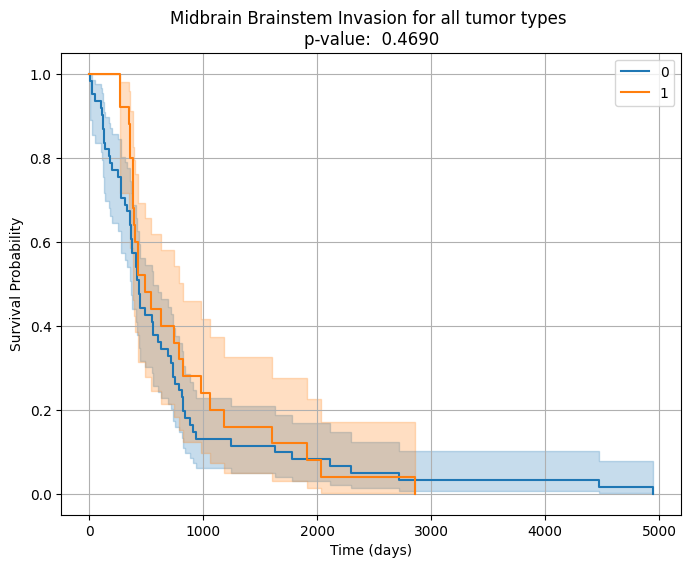

In [72]:
plot_km(df, group_col='midbrain', title='Midbrain Brainstem Invasion for all tumor types ')

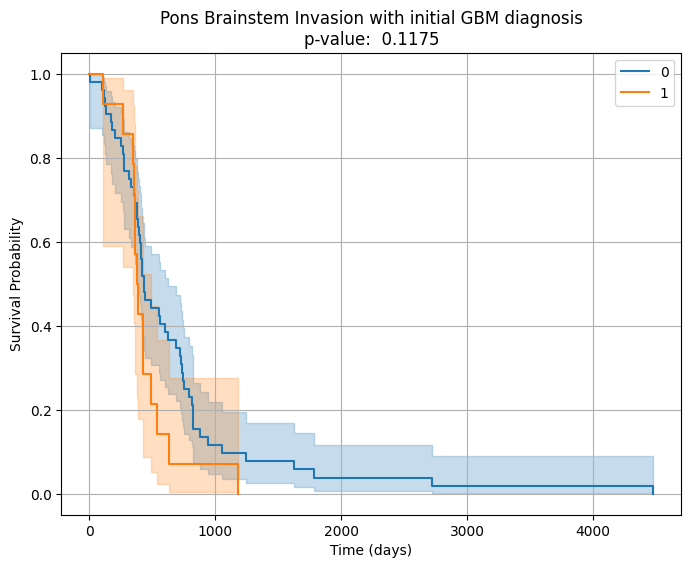

In [73]:
df_bs_gbm = df[ (df['gbm initial dx'] == 'Y')]
plot_km(df_bs_gbm, group_col='pons', title='Pons Brainstem Invasion with initial GBM diagnosis')

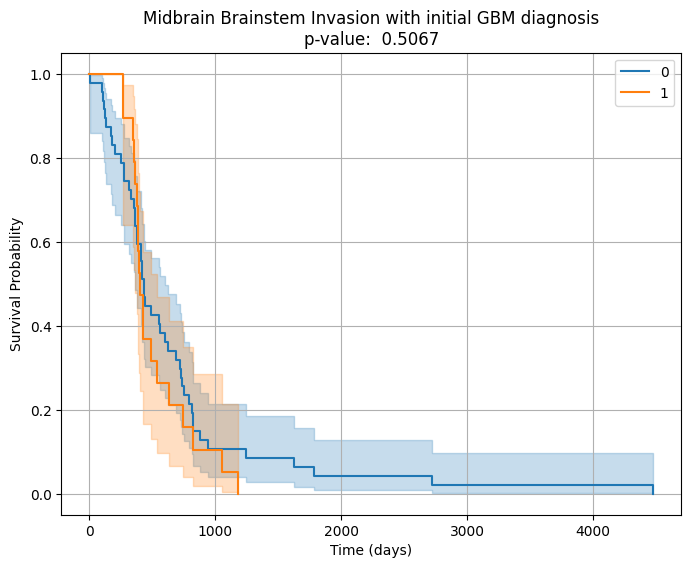

In [74]:
df_bs_gbm = df[ (df['gbm initial dx'] == 'Y')]
plot_km(df_bs_gbm, group_col='midbrain', title='Midbrain Brainstem Invasion with initial GBM diagnosis')

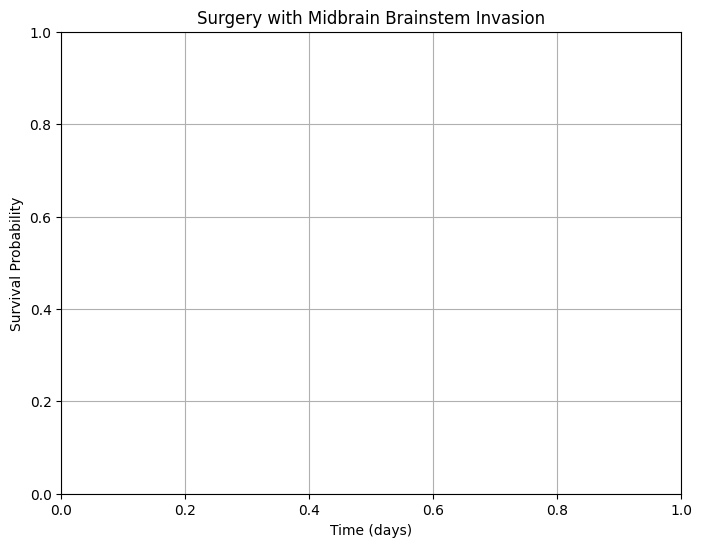

In [13]:
df_bs_gbm = df[ (df['bs_invasion'] == 1) &
    (df['midbrain'] == '1') &
    (df['gbm initial dx'] == 'Y')]
plot_km(df_bs_gbm, group_col='surgery', title='Surgery with Midbrain Brainstem Invasion')

In [98]:
# -------------------------
# Imports for Violin Plots
# -------------------------
import seaborn as sns
from scipy.stats import mannwhitneyu

# -------------------------
# Columns to visualize
# -------------------------
radiomic_features = ['midbrain_cell_voxel_count', 'midbrain_t1_min', 'midbrain_cyt_median','midbrain_cyt_max', 'midbrain_t1c_min', 'midbrain_t1c_mean', 'midbrain_t1c_median', 'midbrain_ecf_median', 'midbrain_ecf_mean', 'midbrain_ecf_min', 'midbrain_cyt_mean', 'pons_t1c_min', 'pons_t1c_mean','pons_t1c_median', 'pons_ecf_mean', 'pons_ecf_median','pons_cyt_max', 'pons_cyt_mean','pons_cyt_median', 'pons_tpm_std', 'pons_tpm_max','pons_cyt_mean', 'pons_cell_max']

In [93]:
FLAIR_radiomic_features = ['midbrain_FLAIR_mean', 'midbrain_FLAIR_median', 'midbrain_FLAIR_std', 'midbrain_FLAIR_min', 'midbrain_FLAIR_max', 'pons_FLAIR_mean', 'pons_FLAIR_median', 'pons_FLAIR_std', 'pons_FLAIR_min', 'pons_FLAIR_max']

In [110]:
bs_radiomic_features = ['pons_cell_max', 'pons_cyt_max', 'pons_ecf_mean', 'pons_cyt_mean', 'midbrain_cyt_max', 'midbrain_cell_voxel_count']

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/2448835136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


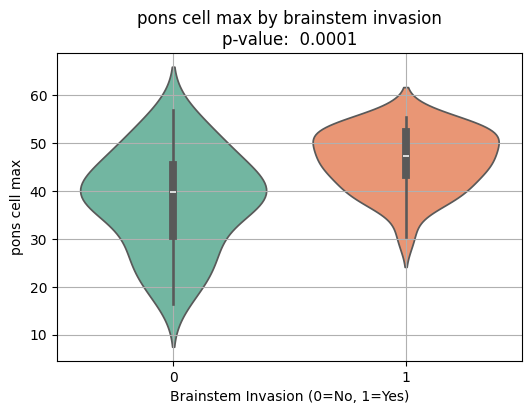

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/2448835136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


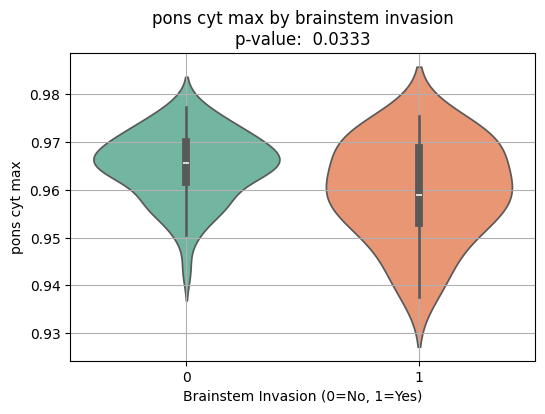

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/2448835136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


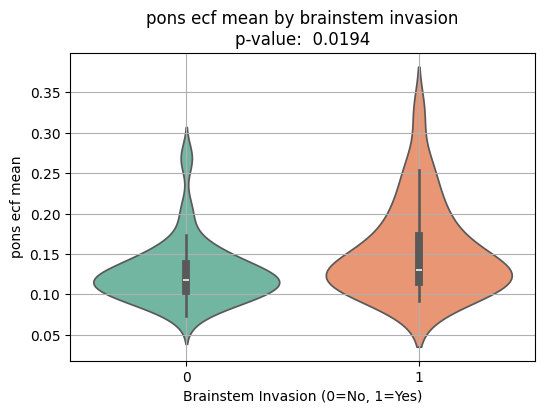

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/2448835136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


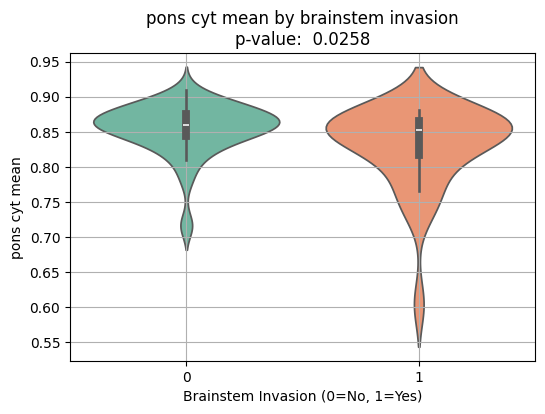

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/2448835136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


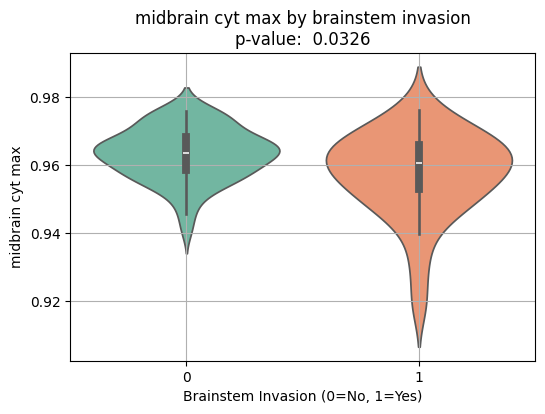

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/2448835136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


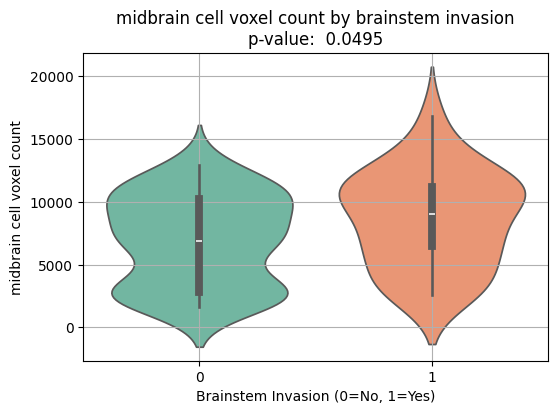

In [112]:
# -------------------------
# Violin plots for Brainstem vs Non-Brainstem
# -------------------------
for feature in bs_radiomic_features:
    clean_feature = feature.replace("_", " ")  # <-- convert underscores to spaces
    plt.figure(figsize=(6,4))
    sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")
    
    # Mann-Whitney U test between brainstem (1) and non-brainstem (0)
    group_bs = df[df['bs_invasion']==1][feature].dropna()
    group_nonbs = df[df['bs_invasion']==0][feature].dropna()
    
    if len(group_bs) > 0 and len(group_nonbs) > 0:
        stat, p_value = mannwhitneyu(group_bs, group_nonbs, alternative='two-sided')
        plt.title(f"{clean_feature} by brainstem invasion\np-value: {p_value: 0.4f}")
    else:
        plt.title(f"{clean_feature} by brainstem invasion\nNot enough data for p-value")

    plt.xlabel("Brainstem Invasion (0=No, 1=Yes)")
    plt.ylabel(clean_feature)
    plt.grid(True)
    plt.show()

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


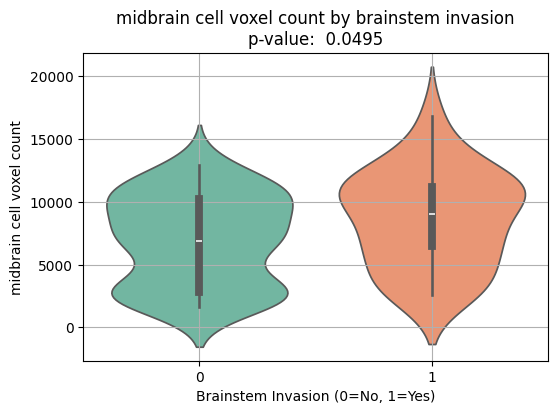

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


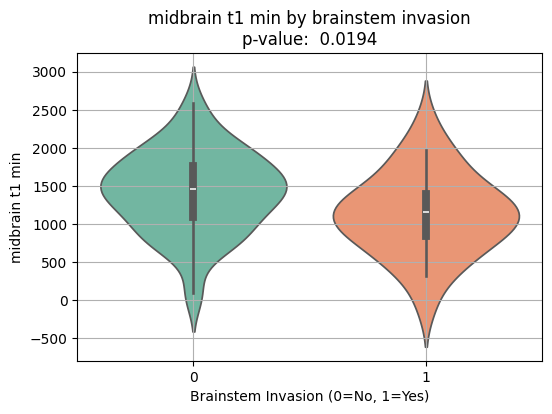

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


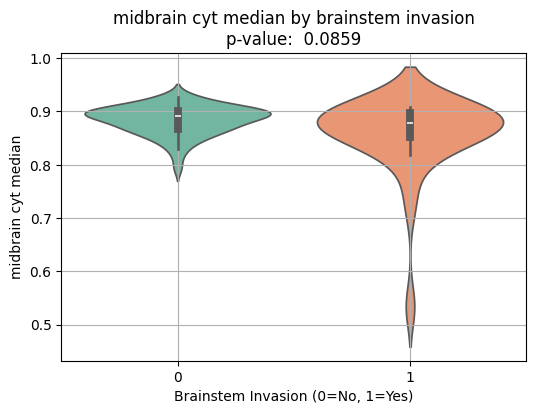

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


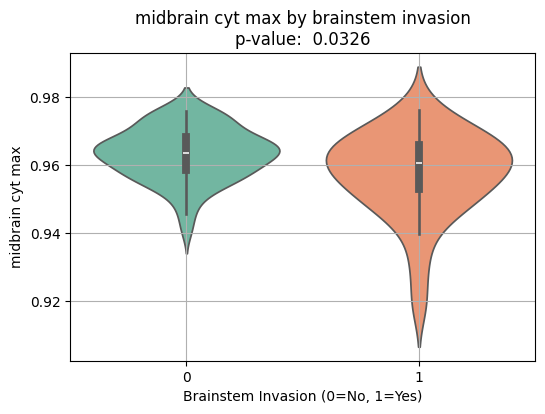

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


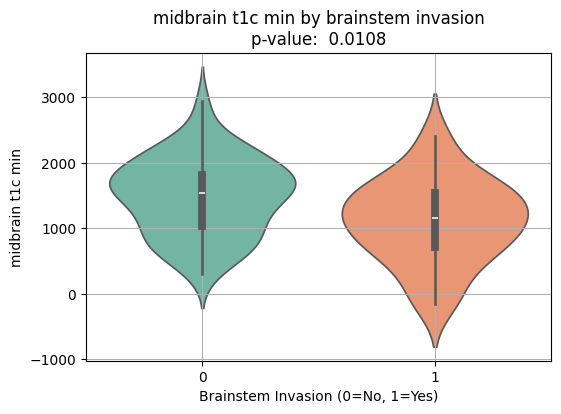

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


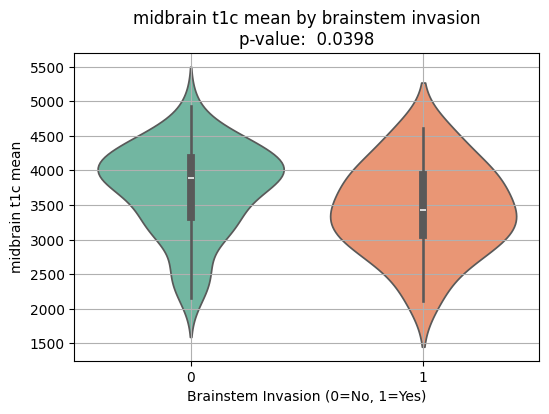

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


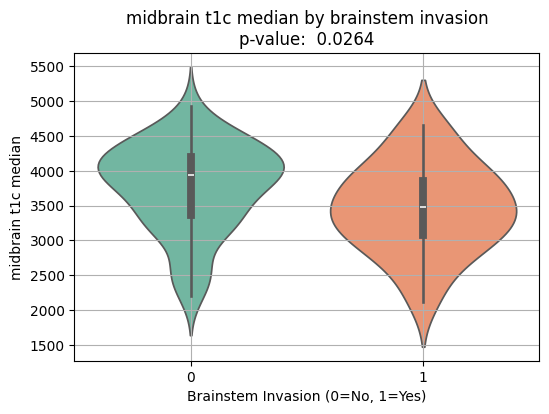

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


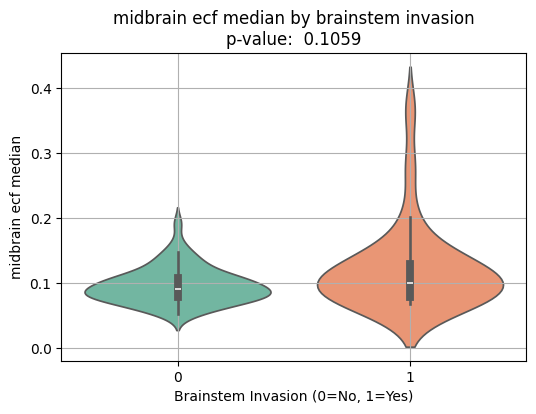

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


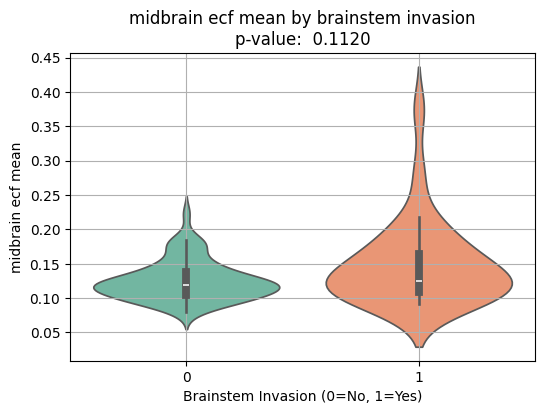

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


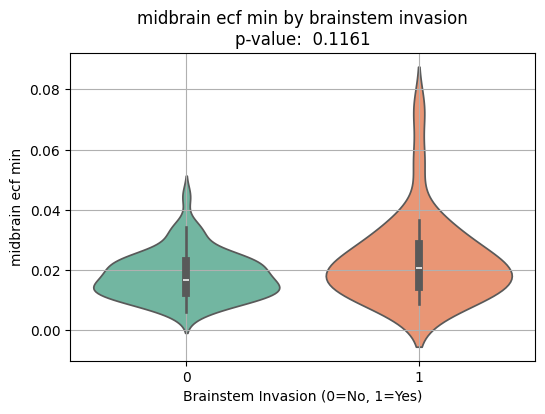

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


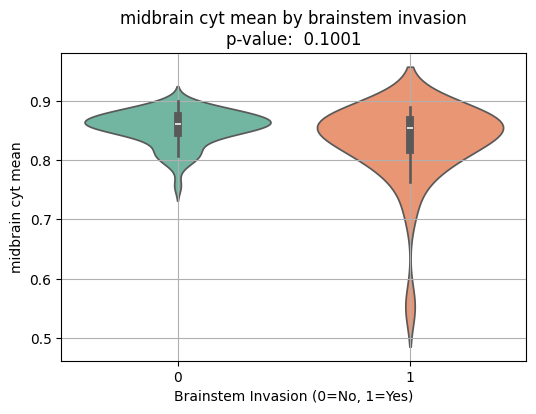

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


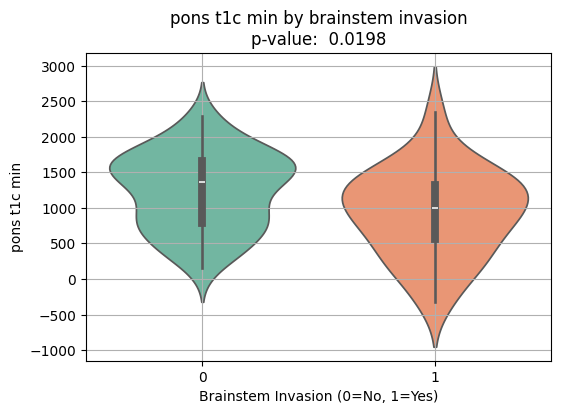

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


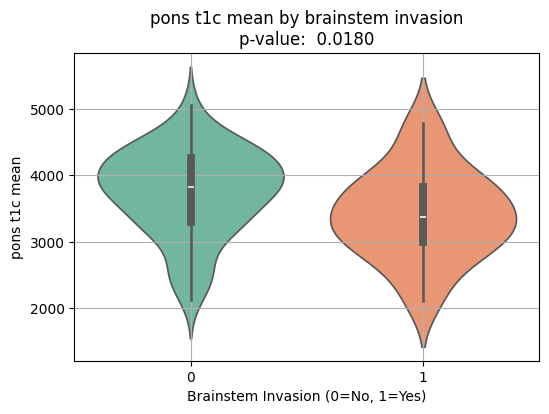

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


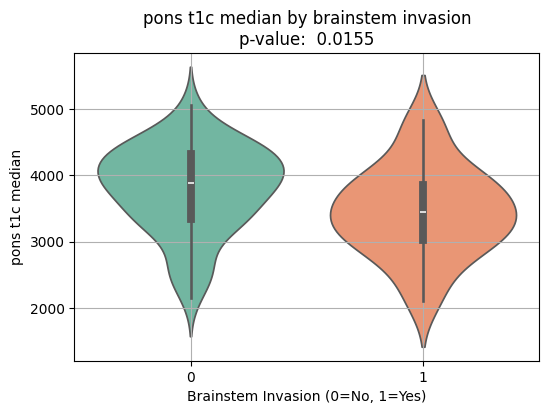

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


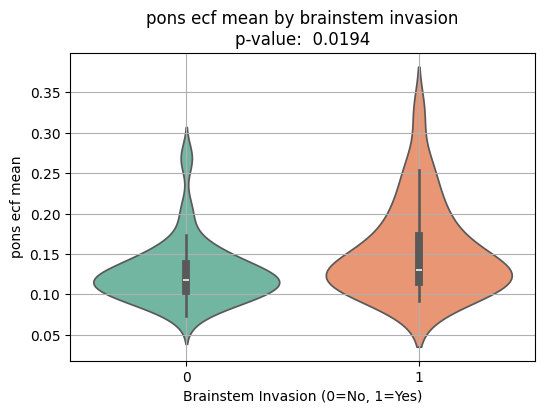

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


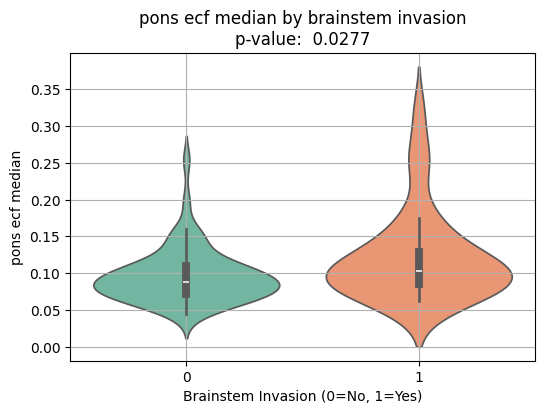

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


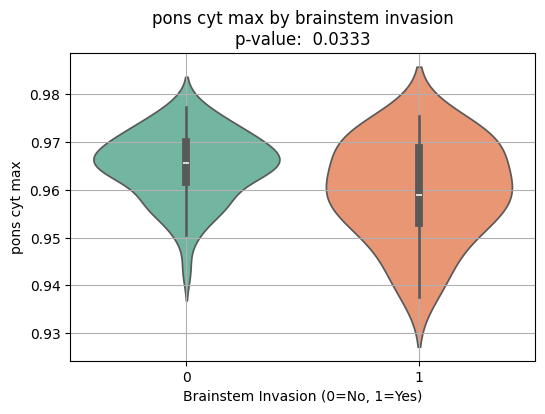

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


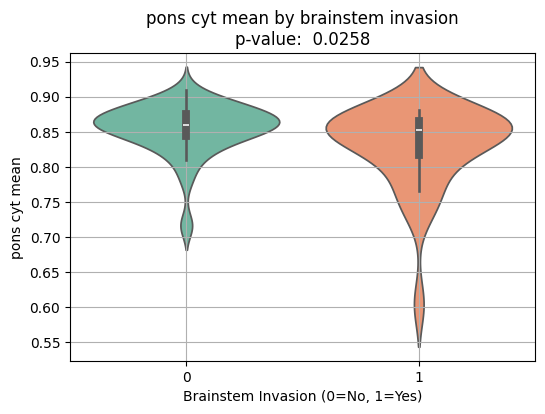

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


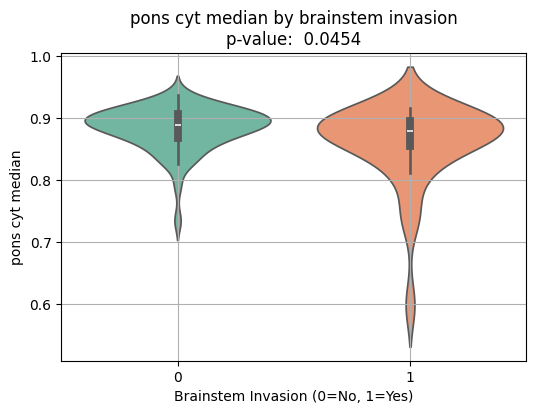

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


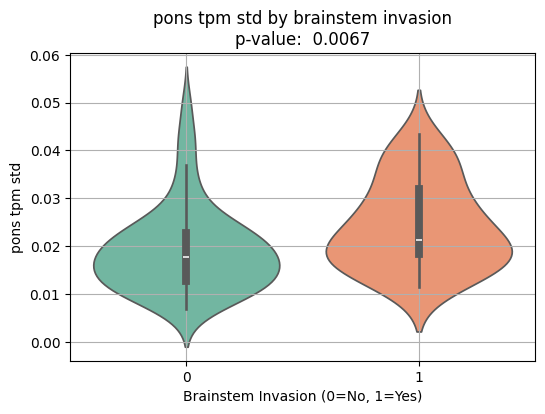

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


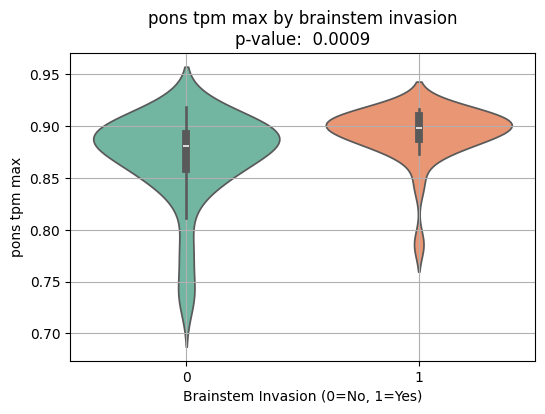

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


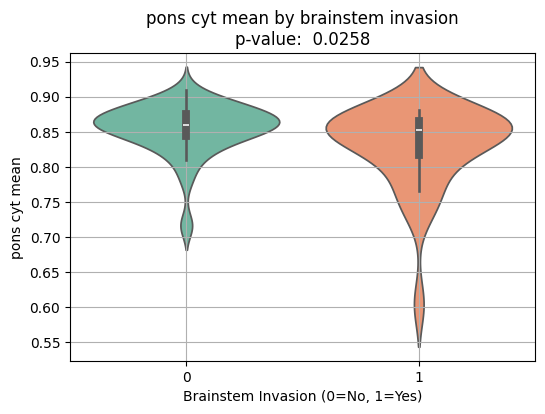

/var/folders/bg/4lv8rs9x26g19r5d1rt77cc80000gt/T/ipykernel_26496/887933697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")


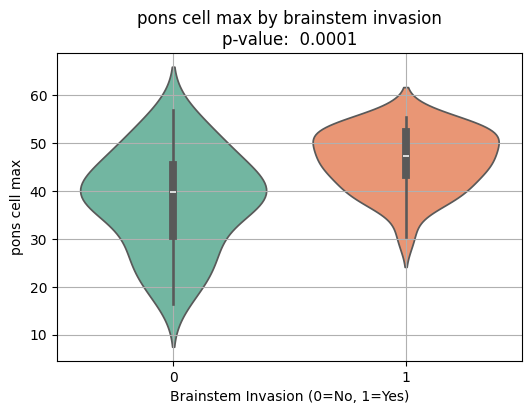

In [114]:
# -------------------------
# Violin plots for Brainstem vs Non-Brainstem
# -------------------------
for feature in radiomic_features:
    clean_feature = feature.replace("_", " ") 
    plt.figure(figsize=(6,4))
    sns.violinplot(x='bs_invasion', y=feature, data=df, palette="Set2")
    
    # Mann-Whitney U test between brainstem (1) and non-brainstem (0)
    group_bs = df[df['bs_invasion']==1][feature].dropna()
    group_nonbs = df[df['bs_invasion']==0][feature].dropna()
    
    if len(group_bs) > 0 and len(group_nonbs) > 0:
        stat, p_value = mannwhitneyu(group_bs, group_nonbs, alternative='two-sided')
        plt.title(f"{clean_feature} by brainstem invasion\np-value: {p_value: 0.4f}")
    else:
        plt.title(f"{clean_feature} by brainstem invasion\nNot enough data for p-value")

    plt.xlabel("Brainstem Invasion (0=No, 1=Yes)")
    plt.ylabel(clean_feature)
    plt.grid(True)
    plt.show()

In [5]:
from lifelines import CoxPHFitter

In [ ]:
# -------------------------
# CONFIG
# -------------------------


# Ensure event column exists.
# If you have a real censoring column, map it here instead of forcing 1.
if 'event' not in df.columns:
    df['event'] = 1

# Binary encodings for Y/N
def yn_to01(series):
    return series.astype(str).str.upper().map({'Y':1, 'N':0})

if 'gbm initial dx' in df.columns:
    df['gbm_initial_dx'] = yn_to01(df['gbm initial dx'])
else:
    raise ValueError("Column 'gbm initial dx' not found.")

# Ensure expected binary predictors exist (coerce to 0/1 if needed)
# Adjust these casts if your data are already numeric 0/1
for col in ['bs_invasion','stupp','midbrain','pons','surgery', 'bevacizumab', 'medulla']:
    if col in df.columns:
        # Try to coerce strings like 'Y'/'N' to 0/1; if already numeric, this keeps as is
        if df[col].dtype == object:
            df[col] = yn_to01(df[col]).fillna(pd.to_numeric(df[col], errors='coerce'))
        df[col] = df[col].astype(float)
    else:
        raise ValueError(f"Required column '{col}' not found.")

# Survival & event types
df['survival_days'] = pd.to_numeric(df['survival_days'], errors='coerce')
df['event'] = pd.to_numeric(df['event'], errors='coerce').fillna(1).astype(int)

# Keep only rows with GBM initial diagnosis = Y
df_gbm = df[df['gbm_initial_dx'] == 1].copy()

# Drop rows with missing essentials
essential_cols = ['survival_days','event','bs_invasion','stupp','midbrain','pons','surgery', 'bevacizumab', 'medulla']
df_gbm = df_gbm.dropna(subset=essential_cols).reset_index(drop=True)

In [ ]:
# -------------------------
# MODEL A: GBM-initial cohort — effect of bs_invasion (adjusted)
# -------------------------
# Note: Including both pons and midbrain alongside bs_invasion can introduce collinearity
# if pons/midbrain are only present when bs_invasion==1. lifelines can still fit, but
# you can run a pared model (without pons/midbrain) as a sensitivity check.
covariates_A = ['bs_invasion','stupp','surgery','midbrain','pons', 'bevacizumab', 'medulla']

cph_A = CoxPHFitter()
cph_A.fit(df_gbm[['survival_days','event'] + covariates_A],
          duration_col='survival_days', event_col='event')
print("\n=== MODEL A: GBM initial dx = Y (with bs_invasion + covariates) ===")
cph_A.print_summary()  # shows HRs, CIs, p-values

# Optional: sensitivity model without location indicators (reduced collinearity)
covariates_A_reduced = ['bs_invasion','stupp','surgery', 'bevacizumab']
cph_A_reduced = CoxPHFitter()
cph_A_reduced.fit(df_gbm[['survival_days','event'] + covariates_A_reduced],
                  duration_col='survival_days', event_col='event')
print("\n=== MODEL A (Reduced): GBM initial dx = Y (bs_invasion + stupp + surgery) ===")
cph_A_reduced.print_summary()

# -------------------------
# MODEL B: Restrict to brainstem-invasion patients — location effects
# -------------------------
df_brainstem = df_gbm[df_gbm['bs_invasion'] == 1].copy()
# If bs_invasion is all 1 here, we drop it from predictors (no variance).
covariates_B = ['stupp','surgery','midbrain','pons', 'medulla']

# Drop rows that are now missing
df_brainstem = df_brainstem.dropna(subset=['survival_days','event'] + covariates_B)

if len(df_brainstem) >= 10 and df_brainstem[covariates_B].sum().sum() > 0:
    cph_B = CoxPHFitter()
    cph_B.fit(df_brainstem[['survival_days','event'] + covariates_B],
              duration_col='survival_days', event_col='event')
    print("\n=== MODEL B: Brainstem-only (bs_invasion==1) — midbrain/pons + treatments ===")
    cph_B.print_summary()
else:
    print("\n[MODEL B skipped] Not enough data after restricting to bs_invasion==1.")

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap

def to_2d_shap(shap_vals):
    """Return SHAP values as (n_samples, n_features) for binary classification."""
    # Handle list (old API: one array per class)
    if isinstance(shap_vals, list):
        arr = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
    # Handle Explanation object (new API)
    elif hasattr(shap_vals, "values"):
        arr = shap_vals.values
    else:
        arr = np.asarray(shap_vals)

    # Collapse (n_samples, n_classes, n_features) -> (n_samples, n_features)
    if arr.ndim == 3:
        # binary: take positive class (index 1)
        if arr.shape[1] >= 2:
            arr = arr[:, 1, :]
        else:
            arr = arr[:, 0, :]
    return arr

def align_shap_to_features(shap_vals_2d, X_df):
    """
    Ensure SHAP array has same n_features as X_df.
    - If it's off-by-one (extra bias column), drop the last column.
    - If it's still mismatched, raise a clear error with diagnostics.
    """
    arr = np.asarray(shap_vals_2d)
    n_feat = X_df.shape[1]
    if arr.shape[1] == n_feat + 1:
        # Drop the extra bias/offset column SHAP sometimes appends
        arr = arr[:, :-1]
    if arr.shape[1] != n_feat:
        raise ValueError(
            f"SHAP features mismatch after alignment: shap_vals={arr.shape}, X_df={X_df.shape}. "
            "Double-check that X_df columns exactly match the data used to compute SHAP."
        )
    return arr


# Load data
data_dir = "/Volumes/Siren/Brain_Analyses/BrainStemRadiomics/T1_last_tp/brainstem_region_outputs"
excel_file = f"{data_dir}/brainstem_region_intensity_stats_wide(1).xlsx"
df = pd.read_excel(excel_file)

print("="*80)
print("DATA OVERVIEW")
print("="*80)
print(f"Total samples: {len(df)}")
print(f"\nbs_invasion distribution:")
print(df['bs_invasion'].value_counts())
print(f"\nbs_invasion proportions:")
print(df['bs_invasion'].value_counts(normalize=True))

# Separate features and label
y = df["bs_invasion"]
X = df.drop(columns=["patient_id", "bs_invasion"])

# Select only numeric columns
X_numeric = X.select_dtypes(include=[np.number])
print(f"\nNumeric features: {X_numeric.shape[1]}")

# Store feature names for later
feature_names = X_numeric.columns.tolist()

# Remove highly correlated features (>0.9)
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)
corr_matrix = X_numeric.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Features removed due to high correlation (>0.9): {len(to_drop)}")

X_reduced = X_numeric.drop(columns=to_drop)
print(f"Remaining features: {X_reduced.shape[1]}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for SHAP
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_reduced.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_reduced.columns)

# ============================================================================
# MODEL 1: RANDOM FOREST
# ============================================================================
print("\n" + "="*80)
print("RANDOM FOREST CLASSIFIER")
print("="*80)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, 
                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                            scoring='roc_auc')
print(f"Cross-validation ROC-AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

# Test performance
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print(f"\nTest ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# ============================================================================
# SHAP ANALYSIS FOR RANDOM FOREST
# ============================================================================
print("\n" + "="*80)
print("SHAP ANALYSIS - RANDOM FOREST")
print("="*80)

# Create SHAP explainer
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf_raw = explainer_rf.shap_values(X_train_scaled_df)
shap_values_rf = to_2d_shap(shap_values_rf_raw)
# Make sure columns match for plotting
shap_values_rf = align_shap_to_features(shap_values_rf, X_train_scaled_df)


print(f"Final SHAP values shape: {shap_values_rf.shape}")

shap_importance = np.abs(shap_values_rf).mean(axis=0)

# Safety cap
K = min(20, X_train_scaled_df.shape[1])
top_features_idx = np.argsort(shap_importance)[::-1][:K]
top_features = [X_train_scaled_df.columns[idx] for idx in top_features_idx]

# # Summary plot
# plt.figure(figsize=(12, 8))
# shap.summary_plot(shap_values_rf, X_train_scaled_df, show=False, max_display=20)
# plt.title("SHAP Feature Importance - Random Forest", fontsize=14, pad=20)
# plt.tight_layout()
# plt.savefig(f"{data_dir}/shap_summary_rf.png", dpi=300, bbox_inches='tight')
# plt.show()

# # Bar plot
# plt.figure(figsize=(12, 8))
# shap.summary_plot(shap_values_rf, X_train_scaled_df, plot_type="bar", 
#                   show=False, max_display=20)
# plt.title("SHAP Feature Importance (Mean |SHAP|) - Random Forest", fontsize=14, pad=20)
# plt.tight_layout()
# plt.savefig(f"{data_dir}/shap_bar_rf.png", dpi=300, bbox_inches='tight')
# plt.show()

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_rf, X_train_scaled_df, show=False, max_display=20)
plt.title("SHAP Feature Importance - Random Forest", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f"{data_dir}/shap_summary_rf.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_rf, X_train_scaled_df, plot_type="bar", show=False, max_display=20)
plt.title("SHAP Feature Importance (Mean |SHAP|) - Random Forest", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f"{data_dir}/shap_bar_rf.png", dpi=300, bbox_inches='tight')
plt.show()


# Get top features by SHAP - FIXED
shap_importance = np.abs(shap_values_rf).mean(axis=0)
print(f"SHAP importance shape: {shap_importance.shape}")

# Ensure it's 1D
if shap_importance.ndim > 1:
    shap_importance = shap_importance.flatten()

top_features_idx = np.argsort(shap_importance)[::-1][:20]
print(f"Top features idx shape: {top_features_idx.shape}")

# Convert to list to avoid indexing issues
top_features = [X_train_scaled_df.columns[idx] for idx in top_features_idx]

print("\nTop 20 Features by SHAP Importance:")
for i, (idx, feat) in enumerate(zip(top_features_idx, top_features), 1):
    print(f"{i:2d}. {feat:50s} | SHAP: {shap_importance[idx]:.4f}")

# ============================================================================
# MODEL 2: LOGISTIC REGRESSION (for comparison)
# ============================================================================
print("\n" + "="*80)
print("LOGISTIC REGRESSION")
print("="*80)

lr_model = LogisticRegression(
    penalty='l1',
    C=0.1,
    solver='liblinear',
    random_state=42,
    class_weight='balanced',
    max_iter=1000
)

lr_model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train,
                                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                scoring='roc_auc')
print(f"Cross-validation ROC-AUC: {cv_scores_lr.mean():.3f} (+/- {cv_scores_lr.std():.3f})")

# Test performance
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print(f"\nTest ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# SHAP for Logistic Regression
print("\n" + "="*80)
print("SHAP ANALYSIS - LOGISTIC REGRESSION")
print("="*80)

# More version-robust SHAP for linear models
explainer_lr = shap.Explainer(lr_model, X_train_scaled_df)
shap_values_lr_raw = explainer_lr(X_train_scaled_df)
shap_values_lr = to_2d_shap(shap_values_lr_raw)
shap_values_lr = align_shap_to_features(shap_values_lr, X_train_scaled_df)

print(f"LR SHAP values shape: {shap_values_lr.shape}")

shap_importance_lr = np.abs(shap_values_lr).mean(axis=0)
K = min(20, X_train_scaled_df.shape[1])
top_features_lr_idx = np.argsort(shap_importance_lr)[::-1][:K]
top_features_lr = [X_train_scaled_df.columns[idx] for idx in top_features_lr_idx]

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_lr, X_train_scaled_df, show=False, max_display=20)
plt.title("SHAP Feature Importance - Logistic Regression", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f"{data_dir}/shap_summary_lr.png", dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# COMPARATIVE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("COMPARATIVE FEATURE ANALYSIS")
print("="*80)

# Compare top features between models
shap_importance_lr = np.abs(shap_values_lr).mean(axis=0)
if shap_importance_lr.ndim > 1:
    shap_importance_lr = shap_importance_lr.flatten()

top_features_lr_idx = np.argsort(shap_importance_lr)[::-1][:20]
top_features_lr = [X_train_scaled_df.columns[idx] for idx in top_features_lr_idx]

print("\nTop 10 Features - Random Forest vs Logistic Regression:")
print(f"{'Rank':<5} {'Random Forest':<50} {'Logistic Regression':<50}")
print("-" * 105)
for i in range(10):
    print(f"{i+1:<5} {top_features[i]:<50} {top_features_lr[i]:<50}")

# ROC Curve comparison
plt.figure(figsize=(10, 8))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.3f})', 
         linewidth=2)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.3f})', 
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - BS Invasion Prediction', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f"{data_dir}/roc_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# DETAILED FEATURE ANALYSIS FOR TOP FEATURES
# ============================================================================
print("\n" + "="*80)
print("DETAILED ANALYSIS OF TOP 10 FEATURES")
print("="*80)

top_10_features = top_features[:10]

# Create comparison plots
fig, axes = plt.subplots(5, 2, figsize=(14, 18))
axes = axes.ravel()

for i, feature in enumerate(top_10_features):
    ax = axes[i]
    
    # Get original (unscaled) values
    feature_data = pd.DataFrame({
        'value': X_reduced[feature],
        'bs_invasion': y
    })
    
    # Box plot
    feature_data.boxplot(column='value', by='bs_invasion', ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel('BS Invasion')
    ax.set_ylabel('Value')
    plt.sca(ax)
    plt.xticks([1, 2], ['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.savefig(f"{data_dir}/top_features_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# Statistical comparison
from scipy.stats import mannwhitneyu

print("\nStatistical Comparison (Mann-Whitney U test):")
print(f"{'Feature':<50} {'p-value':<12} {'Median (0)':<15} {'Median (1)':<15}")
print("-" * 92)

for feature in top_10_features:
    group_0 = X_reduced[y == 0][feature]
    group_1 = X_reduced[y == 1][feature]
    
    stat, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')
    
    print(f"{feature:<50} {p_value:<12.6f} {group_0.median():<15.4f} {group_1.median():<15.4f}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

DATA OVERVIEW
Total samples: 177

bs_invasion distribution:


KeyError: 'bs_invasion'